In [1]:
import torch
import torchani
import os

In [24]:
try:
    path = os.path.dirname(os.path.realpath(__file__))
except NameError:
    path = os.getcwd()

# save existing model parameters into checkpoint file format
const_file = os.path.join(path, '../torchani/resources/ani-1x_8x/rHCNO-5.2R_16-3.5A_a4-8.params')  # noqa: E501
consts = torchani.neurochem.Constants(const_file)
model = []
model_dir = []
for i in range(8):
    model_dir.append(os.path.join(path, '../torchani/resources/ani-1x_8x/train' + str(i) + '/networks'))
    model.append(torchani.neurochem.load_model(consts.species, model_dir[i]))

"\nmodel_dir1 = os.path.join(path, '../torchani/resources/ani-1x_8x/train1/networks')  # noqa: E501\nmodel.append(torchani.neurochem.load_model(consts.species, model_dir1))\nmodel_dir2 = os.path.join(path, '../torchani/resources/ani-1x_8x/train2/networks')  # noqa: E501\nmodel.append(torchani.neurochem.load_model(consts.species, model_dir2))\nmodel_dir3 = os.path.join(path, '../torchani/resources/ani-1x_8x/train3/networks')  # noqa: E501\nmodel.append(torchani.neurochem.load_model(consts.species, model_dir3))\nmodel_dir4 = os.path.join(path, '../torchani/resources/ani-1x_8x/train4/networks')  # noqa: E501\nmodel.append(torchani.neurochem.load_model(consts.species, model_dir4))\nmodel_dir5 = os.path.join(path, '../torchani/resources/ani-1x_8x/train5/networks')  # noqa: E501\nmodel.append(torchani.neurochem.load_model(consts.species, model_dir5))\nmodel_dir6 = os.path.join(path, '../torchani/resources/ani-1x_8x/train6/networks')  # noqa: E501\nmodel.append(torchani.neurochem.load_model(c

In [26]:
print(model[7])

ANIModel(
  (0): Sequential(
    (0): Linear(in_features=384, out_features=160, bias=True)
    (1): CELU(alpha=0.1)
    (2): Linear(in_features=160, out_features=128, bias=True)
    (3): CELU(alpha=0.1)
    (4): Linear(in_features=128, out_features=96, bias=True)
    (5): CELU(alpha=0.1)
    (6): Linear(in_features=96, out_features=1, bias=True)
  )
  (1): Sequential(
    (0): Linear(in_features=384, out_features=144, bias=True)
    (1): CELU(alpha=0.1)
    (2): Linear(in_features=144, out_features=112, bias=True)
    (3): CELU(alpha=0.1)
    (4): Linear(in_features=112, out_features=96, bias=True)
    (5): CELU(alpha=0.1)
    (6): Linear(in_features=96, out_features=1, bias=True)
  )
  (2): Sequential(
    (0): Linear(in_features=384, out_features=128, bias=True)
    (1): CELU(alpha=0.1)
    (2): Linear(in_features=128, out_features=112, bias=True)
    (3): CELU(alpha=0.1)
    (4): Linear(in_features=112, out_features=96, bias=True)
    (5): CELU(alpha=0.1)
    (6): Linear(in_features

In [44]:
total_params = [ [[],[],[],[],[],[],[],[]],
                 [[],[],[],[],[],[],[],[]],
                 [[],[],[],[],[],[],[],[]],
                 [[],[],[],[],[],[],[],[]] ]
for i in range(8):
    for i_module in range(4):
        total_params[i_module][i].append(torch.Tensor())
        for i_layer in range(0, 7, 1):
            print('model.module:', i_module, ' i_module.layer', i_layer)
            for param in model[i][i_module][i_layer].parameters():
                param = torch.flatten(param)
                total_params[i_module][i][0] = torch.cat((total_params[i_module][i][0], param))
                print(param.size())
                print('total params in module ',i_module, ' is ', total_params[i_module][i][0].size())
        print(total_params[i_module][i][0])
        print(torch.max(abs(total_params[i_module][i][0])))


model.module: 0  i_module.layer 0
torch.Size([61440])
total params in module  0  is  torch.Size([61440])
torch.Size([160])
total params in module  0  is  torch.Size([61600])
model.module: 0  i_module.layer 1
model.module: 0  i_module.layer 2
torch.Size([20480])
total params in module  0  is  torch.Size([82080])
torch.Size([128])
total params in module  0  is  torch.Size([82208])
model.module: 0  i_module.layer 3
model.module: 0  i_module.layer 4
torch.Size([12288])
total params in module  0  is  torch.Size([94496])
torch.Size([96])
total params in module  0  is  torch.Size([94592])
model.module: 0  i_module.layer 5
model.module: 0  i_module.layer 6
torch.Size([96])
total params in module  0  is  torch.Size([94688])
torch.Size([1])
total params in module  0  is  torch.Size([94689])
tensor([ 1.3325e-01, -3.2251e-02,  2.6246e-01,  ...,  3.0946e-06,
         1.7292e-04, -3.7135e-03], grad_fn=<CatBackward>)
tensor(5.6990, grad_fn=<MaxBackward1>)
model.module: 1  i_module.layer 0
torch.Size(

total params in module  0  is  torch.Size([94592])
model.module: 0  i_module.layer 5
model.module: 0  i_module.layer 6
torch.Size([96])
total params in module  0  is  torch.Size([94688])
torch.Size([1])
total params in module  0  is  torch.Size([94689])
tensor([-1.4126e+00, -2.3753e-02, -3.2527e-01,  ..., -2.0002e-05,
         7.5176e-05, -3.6933e-03], grad_fn=<CatBackward>)
tensor(6.8715, grad_fn=<MaxBackward1>)
model.module: 1  i_module.layer 0
torch.Size([55296])
total params in module  1  is  torch.Size([55296])
torch.Size([144])
total params in module  1  is  torch.Size([55440])
model.module: 1  i_module.layer 1
model.module: 1  i_module.layer 2
torch.Size([16128])
total params in module  1  is  torch.Size([71568])
torch.Size([112])
total params in module  1  is  torch.Size([71680])
model.module: 1  i_module.layer 3
model.module: 1  i_module.layer 4
torch.Size([10752])
total params in module  1  is  torch.Size([82432])
torch.Size([96])
total params in module  1  is  torch.Size([82

model.module: 1  i_module.layer 2
torch.Size([16128])
total params in module  1  is  torch.Size([71568])
torch.Size([112])
total params in module  1  is  torch.Size([71680])
model.module: 1  i_module.layer 3
model.module: 1  i_module.layer 4
torch.Size([10752])
total params in module  1  is  torch.Size([82432])
torch.Size([96])
total params in module  1  is  torch.Size([82528])
model.module: 1  i_module.layer 5
model.module: 1  i_module.layer 6
torch.Size([96])
total params in module  1  is  torch.Size([82624])
torch.Size([1])
total params in module  1  is  torch.Size([82625])
tensor([ 8.4292e-02, -2.2020e-01, -1.7984e+00,  ..., -1.3174e-04,
         2.9090e-05, -1.2237e-03], grad_fn=<CatBackward>)
tensor(13.7617, grad_fn=<MaxBackward1>)
model.module: 2  i_module.layer 0
torch.Size([49152])
total params in module  2  is  torch.Size([49152])
torch.Size([128])
total params in module  2  is  torch.Size([49280])
model.module: 2  i_module.layer 1
model.module: 2  i_module.layer 2
torch.Size

total params in module  1  is  torch.Size([82625])
tensor([-0.0629,  0.2739, -0.2080,  ...,  0.0004, -0.0585, -0.0029],
       grad_fn=<CatBackward>)
tensor(12.8925, grad_fn=<MaxBackward1>)
model.module: 2  i_module.layer 0
torch.Size([49152])
total params in module  2  is  torch.Size([49152])
torch.Size([128])
total params in module  2  is  torch.Size([49280])
model.module: 2  i_module.layer 1
model.module: 2  i_module.layer 2
torch.Size([14336])
total params in module  2  is  torch.Size([63616])
torch.Size([112])
total params in module  2  is  torch.Size([63728])
model.module: 2  i_module.layer 3
model.module: 2  i_module.layer 4
torch.Size([10752])
total params in module  2  is  torch.Size([74480])
torch.Size([96])
total params in module  2  is  torch.Size([74576])
model.module: 2  i_module.layer 5
model.module: 2  i_module.layer 6
torch.Size([96])
total params in module  2  is  torch.Size([74672])
torch.Size([1])
total params in module  2  is  torch.Size([74673])
tensor([-1.3890e-0

In [45]:
for i, elem in enumerate(['H', 'C', 'N', 'O']):
    out_file_name = 'ani1x_0_' + elem + '_params.txt'
    f_out = open(out_file_name, 'w+')
    n_params = total_params[i][0][0].numel()
    for p in range(n_params):
        f_out.write('%-8d ' % p)
        for i_nn in range(8):
            pass
            f_out.write(' %16.12f ' % total_params[i][i_nn][0][p])
        f_out.write('\n')
    f_out.close()

In [46]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


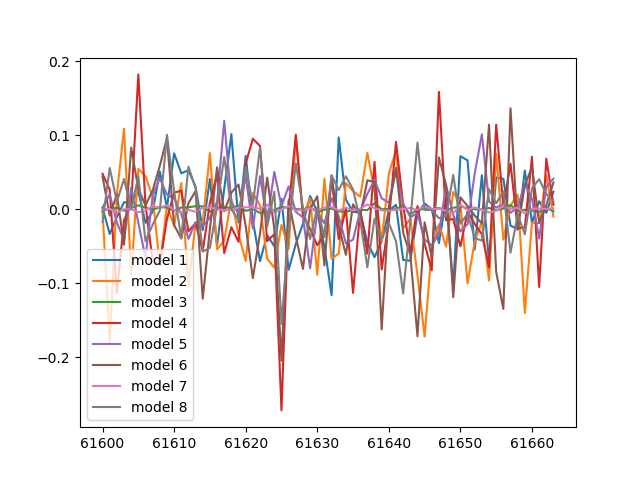

In [75]:
lines = np.loadtxt("ani1x_0_H_params.txt", dtype=np.float64)
# x = lines[:, 0]
# y = lines[:, 1:]
idx = range(61600, 61664)

plt.figure(0)
plt.clf()
for i in range(1, 9):
    # plt.scatter(lines[idx, 0], lines[idx, i], edgecolors='none', s=8, alpha=0.5, label=('model %s' % i))
    plt.plot(lines[idx, 0], lines[idx, i], label=('model %s' % i))
plt.legend()
plt.show()
